 # __DAMA50: Unit3 Notebook [2-1-2024]__

# Determinant and Trace

In [1]:
%display latex

In [2]:
A=random_matrix(QQ,4,4);A

[   2   -1    2    1]
[  -1   -1   -2   -2]
[  -1    2 -1/2   -1]
[   1    0   -1    0]

In [3]:
det(A)

25/2

In [4]:
A.trace()

1/2

# Cholesky decomposition

In [3]:
m=random_matrix(RDF, 8);
A=transpose(m)*m;A.n(digits=3)

[   1.96   -1.20    1.02   0.549   -1.72   -1.37  -0.441  -0.119]
[  -1.20    4.24 -0.0823  -0.154    1.61   0.827   -1.72   0.252]
[   1.02 -0.0823    3.14    1.77   -1.09   0.613  -0.911    1.06]
[  0.549  -0.154    1.77    2.54   0.134   0.606   0.202   0.225]
[  -1.72    1.61   -1.09   0.134    2.37   0.721   0.658  -0.857]
[  -1.37   0.827   0.613   0.606   0.721    2.81  -0.534    1.12]
[ -0.441   -1.72  -0.911   0.202   0.658  -0.534    2.66   0.148]
[ -0.119   0.252    1.06   0.225  -0.857    1.12   0.148    2.97]

In [4]:
C=A.cholesky();
C.n(digits=3)

[    1.40    0.000    0.000    0.000    0.000    0.000    0.000    0.000]
[  -0.855     1.87    0.000    0.000    0.000    0.000    0.000    0.000]
[   0.729    0.289     1.59    0.000    0.000    0.000    0.000    0.000]
[   0.392   0.0971    0.914     1.24    0.000    0.000    0.000    0.000]
[   -1.23    0.300   -0.176    0.603    0.606    0.000    0.000    0.000]
[  -0.982 -0.00654    0.838    0.181   -0.738    0.750    0.000    0.000]
[  -0.315    -1.06   -0.236    0.518    0.388   -0.614    0.760    0.000]
[ -0.0851   0.0958    0.692   -0.308    -1.13   -0.420    0.955    0.117]

In [5]:
(C*transpose(C)-A).n(digits=3)

[ 2.22e-16     0.000  2.22e-16     0.000     0.000     0.000 -5.55e-17     0.000]
[    0.000  8.88e-16     0.000     0.000     0.000     0.000 -2.22e-16     0.000]
[ 2.22e-16     0.000     0.000     0.000     0.000     0.000     0.000     0.000]
[    0.000     0.000     0.000     0.000     0.000 -1.11e-16  1.11e-16  5.55e-17]
[    0.000     0.000     0.000     0.000     0.000     0.000     0.000  1.11e-16]
[    0.000     0.000     0.000 -1.11e-16     0.000     0.000     0.000 -2.22e-16]
[-5.55e-17 -2.22e-16     0.000  1.11e-16     0.000     0.000  4.44e-16     0.000]
[    0.000     0.000     0.000  5.55e-17  1.11e-16 -2.22e-16     0.000     0.000]

# Eigenvalues and Eigenvectors

In [7]:
%display latex
A=matrix(QQ,[[4,-2,1,-1],[-2,2,3,-3],[1,3,4,-1],[-1,-3,-1,4]]);
A

[ 4 -2  1 -1]
[-2  2  3 -3]
[ 1  3  4 -1]
[-1 -3 -1  4]

In [8]:
u(x)=A.characteristic_polynomial(x);
u(x)

x^4 - 14*x^3 + 47*x^2 + 38*x - 240

We remark that the matrix $A$ satisfies the characteristic polynomilal equation $u(x)=0$

In [12]:
A^4-14*A^3+47*A^2+38*A-240

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

In [9]:
solve(u(x)==0,x)

[x == 8, x == -2, x == 3, x == 5]

In [10]:
A.eigenvalues()

[8, 5, 3, -2]

In [11]:
A.eigenvectors_right()

[(8,
  [
  (0, 1, 1, -1)
  ],
  1),
 (5,
  [
  (1, -1/3, 1/6, -1/6)
  ],
  1),
 (3,
  [
  (0, 0, 1, 1)
  ],
  1),
 (-2,
  [
  (1, 2, -1, 1)
  ],
  1)]

In [12]:
DU,PU=A.eigenmatrix_right()
DU,PU

(
[ 8  0  0  0]  [   0    1    0    1]
[ 0  5  0  0]  [   1 -1/3    0    2]
[ 0  0  3  0]  [   1  1/6    1   -1]
[ 0  0  0 -2], [  -1 -1/6    1    1]
)

In [13]:
p1,p2,p3,p4=PU.columns();

In [14]:
P=column_matrix([p1.normalized(),p2.normalized(),p3.normalized(),p4.normalized()]);
P

[             0  6/7*sqrt(7/6)              0    1/7*sqrt(7)]
[   1/3*sqrt(3) -2/7*sqrt(7/6)              0    2/7*sqrt(7)]
[   1/3*sqrt(3)  1/7*sqrt(7/6)    1/2*sqrt(2)   -1/7*sqrt(7)]
[  -1/3*sqrt(3) -1/7*sqrt(7/6)    1/2*sqrt(2)    1/7*sqrt(7)]

Eigendecomposition $A= P\,D\,P^T$ according to the Spectral Theorem

In [15]:
P*DU*transpose(P)

[ 4 -2  1 -1]
[-2  2  3 -3]
[ 1  3  4 -1]
[-1 -3 -1  4]

In [20]:
P*DU*transpose(P)==A

True

# Singular Value Decomposition (SVD)

In [16]:
A=matrix(RDF,[[1,-0.8],[0,1],[1,0]]);A

[ 1.0 -0.8]
[ 0.0  1.0]
[ 1.0  0.0]

In [17]:
U,S,V=A.SVD()

In [19]:
U.n(digits=3)

[  -0.788 1.67e-16   -0.615]
[   0.384   -0.781   -0.492]
[  -0.481   -0.625    0.615]

In [20]:
S.n(digits=4)

[ 1.625 0.0000]
[0.0000  1.000]
[0.0000 0.0000]

In [21]:
V.n(digits=4)

[-0.7809 -0.6247]
[ 0.6247 -0.7809]

In [22]:
AA=U*S*transpose(V);AA

[    0.9999999999999997    -0.7999999999999997]
[-5.551115123125783e-17     1.0000000000000004]
[    0.9999999999999999 1.1102230246251565e-16]

In [23]:
AA.n(digits=4)

[     1.000    -0.8000]
[-5.551e-17      1.000]
[     1.000  1.110e-16]

#### Important note

In sagemath the SVD is implemented only for numerically.
In case  the matrix is defined over the ring of rationals we have to change 
the ring to RDF (real double precision numbers) before applying the SVD.

In [20]:
A=matrix(QQ,[[1,2],[3,4]])
AR=A.change_ring(RDF);AR

[1.0 2.0]
[3.0 4.0]

# Applications of SVD

## Example 1: Orthogonal Procrustes problem

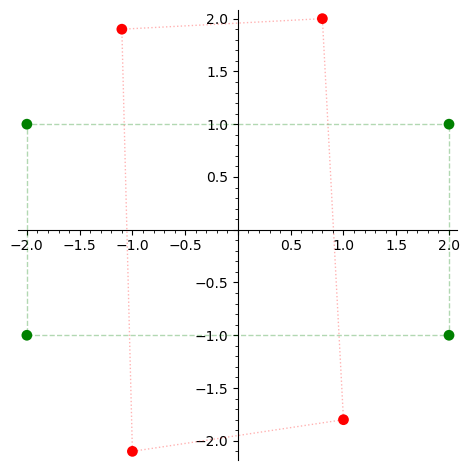

In [48]:
a1=[-1.1,1.9];
a2=[-1,-2.1];
a3=[1,-1.8];
a4=[.8,2];

b1=[2,1];
b2=[-2,1];
b3=[-2,-1];
b4=[2,-1];
ga=points([a1,a2,a3,a4],size=60,color="red")+line([a1,a2,a3,a4,a1],color="red",linestyle=":",alpha=.3);
gb=points([b1,b2,b3,b4],size=60,color="green")+line([b1,b2,b3,b4,b1],color="green",linestyle="--",alpha=.3);
show(ga+gb,aspect_ratio=1)

In [49]:
A=column_matrix(RDF,[a1,a2,a3,a4]);A

[-1.1 -1.0  1.0  0.8]
[ 1.9 -2.1 -1.8  2.0]

In [50]:
B=column_matrix(RDF,[b1,b2,b3,b4]);B

[ 2.0 -2.0 -2.0  2.0]
[ 1.0  1.0 -1.0 -1.0]

In [51]:
W=B*transpose(A);W

[ -0.6000000000000001                 15.6]
[ -3.9000000000000004 -0.40000000000000013]

In [52]:
U,S,V=W.SVD()

In [53]:
U.n(digits=4),S.n(digits=4),V.n(digits=4)

(
[-0.9999 0.01707]  [ 15.61 0.0000]  [ 0.03416  -0.9994]
[0.01707  0.9999], [0.0000  3.912], [ -0.9994 -0.03416]
)

In [54]:
Q=U*transpose(V);Q

[ -0.05121475197315852    0.9986876634765885]
[  -0.9986876634765887 -0.051214751973158196]

In [55]:
AA=Q*A;AA

[ 1.9538427877759925  -2.046029341327677  -1.848852546231018  1.9564035253746503]
[ 1.0012484010752472  1.1062386426202209 -0.9065011099249038 -0.9013796347275873]

In [56]:
aa1,aa2,aa3,aa4=[AA[:,i].coefficients() for i in range(4)]

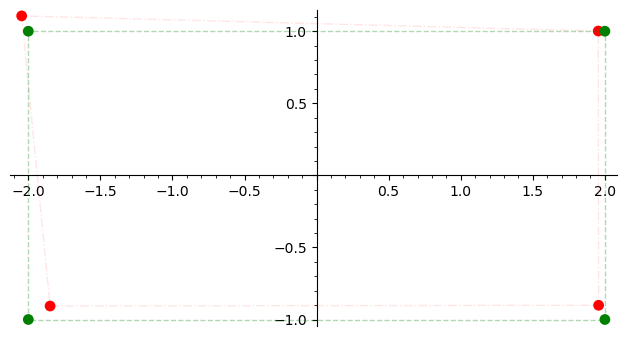

In [57]:
gg=point([aa1,aa2,aa3,aa4],color="red",size=60)+line([aa1,aa2,aa3,aa4,aa1],color="red",linestyle="-.",alpha=.1)+gb;
show(gg,aspect_ratio=1)

In [106]:
(AA-B).norm('frob')

0.24238733561539041

## Verification using rotation

In [13]:
t=var('t')
RO=matrix(SR,[[cos(t),-sin(t)],[sin(t),cos(t)]])
def fnorm(tt):
    return n((RO(t=tt)*A-B).norm('frob'))

In [14]:
FD=[[tt,fnorm(tt)] for tt in srange(0,2*pi,.001)]

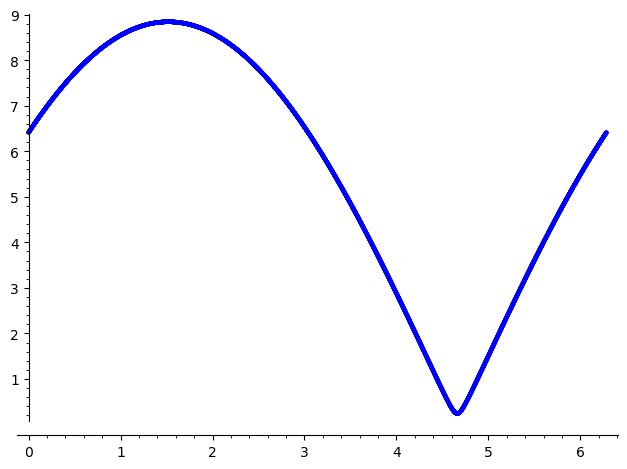

In [15]:
points(FD)

In [17]:
FD[4643]

[4.64299999999989, 0.255313354188088]

In [20]:
RO(t=4.643)*A

[  1.97169438812494  -2.02561314493202  -1.86500170196718   1.93972045210145]
[ 0.965619614463480   1.14319350377730 -0.872793590523845 -0.936741462570837]

In [21]:
AA

[ 1.9538427877759925  -2.046029341327677  -1.848852546231018  1.9564035253746503]
[ 1.0012484010752472  1.1062386426202209 -0.9065011099249038 -0.9013796347275873]

# Example 2: Pseudoinverse

In [9]:
A=random_matrix(RDF,3,2);A

[-0.3667874012485228  0.8320649294740448]
[-0.2976152176149989  0.6553805360215008]
[ 0.3150971380347669 -0.4430514569050983]

In [10]:
A.pseudoinverse()

[ 3.143426067832674 1.7378323818076051  8.474131049177133]
[ 2.157094536352143  1.340762389880751 3.7773316415810463]

In [11]:
U,S,V=A.SVD()

In [12]:
U,S,V

(
[  -0.7114584688299694   -0.3683754632865759    0.5984366008012175]
[  -0.5633810206393074  -0.21001437296257902   -0.7990593149025589]
[  0.42003413279580903   -0.9056453396322065 -0.058119240264626115],

[ 1.2771076517286855                 0.0]
[                0.0 0.09767474129282032]
[                0.0                 0.0],

[ 0.43925531281381475   -0.898362271116078]
[  -0.898362271116078 -0.43925531281381475]
)

In [15]:
V*(S.pseudoinverse())*transpose(U)

[3.1434260678326735 1.7378323818076051  8.474131049177133]
[ 2.157094536352143  1.340762389880751 3.7773316415810463]

# Example 3: Least Squares

### Prepare example data along the line $y=2 x +3 $ with a bit of randomness

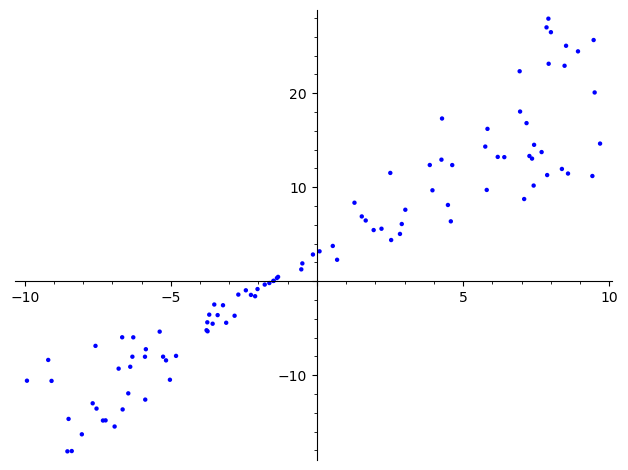

In [25]:
def ra(a,b):
    return (b-a)*random()+a

nop=100
f(x)=2*x+3
data=[]
for j in range(nop):
    xx=ra(-10,10)
    yy=f(xx)*(1.+0.5*ra(-1,1))
    data.append([xx,yy])
gp=points(data);gp

In [122]:
data[0:10]

[[7.607524879463952, 11.5194619851227],
 [6.312727307329766, 23.1791990023600],
 [-8.697695349673683, -15.5546354796776],
 [8.011534744379293, 11.5801460890748],
 [-0.602469198733651, 1.53199536068831],
 [5.641720059753435, 15.2473495528974],
 [-6.554518337960074, -6.55772329689594],
 [-4.89896058051597, -6.41894180648174],
 [-9.428893366102107, -16.6886108299446],
 [-4.03448863201551, -4.03859758558699]]

In [26]:
A=matrix(RDF,[[data[i][0],1] for i in range(len(data))])
B=vector(RDF,[data[i][1] for i in range(len(data))])

In [27]:
U,S,V=A.SVD()

In [28]:
aa,bb=V*(S.pseudoinverse())*transpose(U)*B;
(aa,bb)

(1.9033767625924711, 2.5359728389285237)

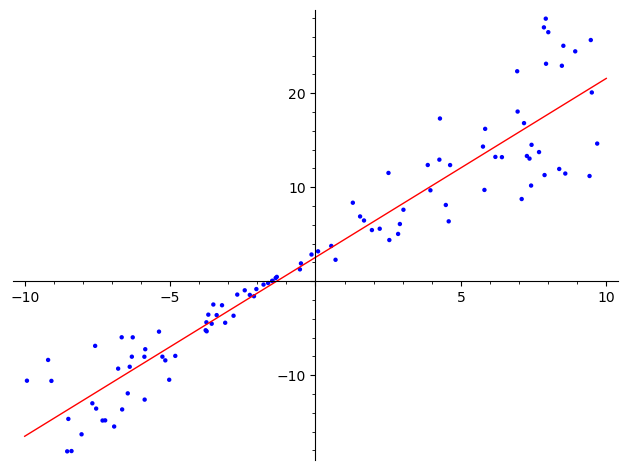

In [29]:
gp+plot(aa*x+bb,(x,-10,10),color="red")

# Example 4: Image compression

In [30]:
# Use plain as the display style.
%display plain

In [31]:
# Load some python packages.
# This runs only on a local installation of sagemath
from PIL import Image # Python Image Library
import numpy as np # Numerical Python package 
import numpy.linalg as ln # Linear argebra package in numpy
import matplotlib.pyplot as plt # Matplot library.

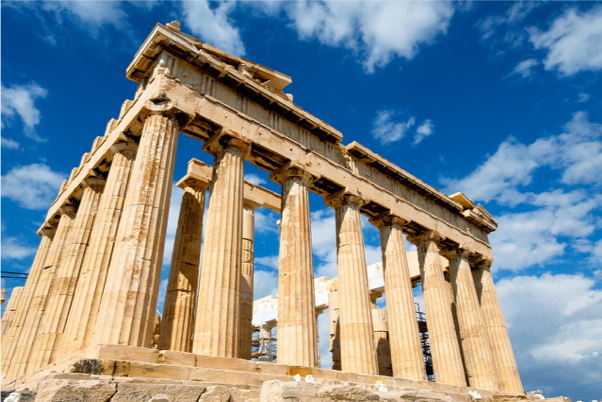

In [32]:
# Load a local png image.
# Image source: https://pixabay.com/en/greece-palace-parthenon-iconic-1594689
# or in png format: https://upload.wikimedia.org/wikipedia/commons/0/00/Parthenon.png
# The image must be placed in the same directory as this notebook. 
# Otherwise, the absolute path to the image is required.
img = Image.open("Parthenon.png")
img

Image size: (602, 402)


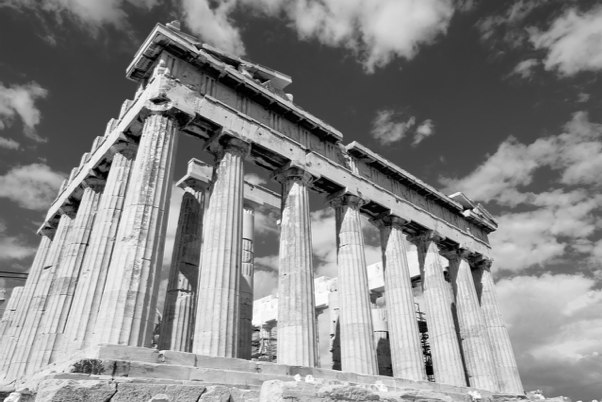

In [33]:
# Convert the image to grayscale.
imgGray = img.convert('L')
print("Image size:", imgGray.size)
imgGray

In [34]:
# Convert the image to numpy array and then to sagemath matrix in order to be able 
# to be loaded to the SVD function of sagemath.
image = np.asarray(imgGray)
image = matrix(RDF, image)

In [35]:
# Apply the SVD.
U, S, V = image.SVD()

In [69]:
# Display the first four columns of the first four rows
U[:4,:4]

[ -0.043267333570506175    0.08318156574848812  -0.003000521584581273     0.0409866578224081]
[  -0.04291587686604137    0.08532461845938316  -0.003328522437253867     0.0404888146498333]
[  -0.04283266921715144    0.08663585230039239  -0.003940595105021091    0.04093557005702986]
[  -0.04288642608431208    0.08770734567663696 -0.0029708601062022584     0.0410812130132269]

In [70]:
# Display the first four columnse of the first four rows
S[:4,:4]

[ 70689.44819487561                0.0                0.0                0.0]
[               0.0  8786.833194938614                0.0                0.0]
[               0.0                0.0  7590.131822491038                0.0]
[               0.0                0.0                0.0 7348.4353321930375]

In [71]:
[S[i,i] for i in range(30)]

[70689.44819487561,
 8786.833194938614,
 7590.131822491038,
 7348.4353321930375,
 5999.339909549217,
 5855.83970237839,
 5113.26699665188,
 4751.009994760405,
 4415.173115337724,
 4262.619136687687,
 3885.83000532754,
 3754.2422749889693,
 3652.849308619503,
 3096.163836411585,
 3024.0789650002835,
 2828.825683450216,
 2587.7588838970732,
 2526.6378969216244,
 2392.24572402843,
 2313.2924600848264,
 2239.153672051027,
 2189.4897040053993,
 2104.085904039683,
 2000.053366624072,
 1974.456366586145,
 1883.021230657427,
 1780.957047777695,
 1740.846456401274,
 1682.2690862832224,
 1594.1295128542813]

Image size: (402, 602)


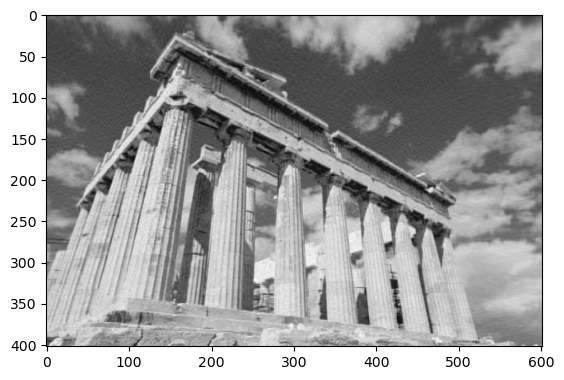

In [37]:
# Reconstruct the image using rank-10 approximation.
kr=100
reconstimg = np.matrix(U[:,:kr] * S[:kr,:kr] * V[:, :kr].transpose())
#
# Size of the reconstructed image.
n, m = reconstimg.shape
print ("Image size: (%i, %i)" % (n,m))
# Display the reconstructed image.
plt.imshow(reconstimg, cmap = 'gray')
plt.show()

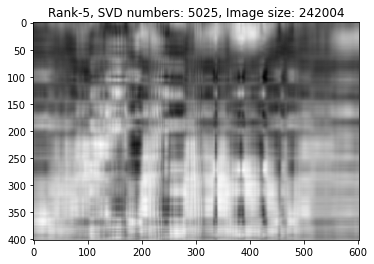

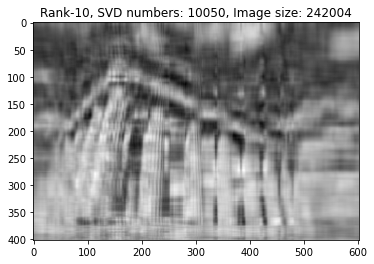

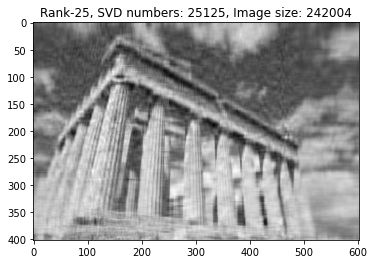

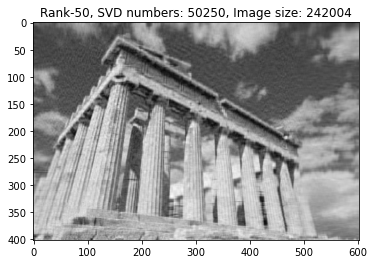

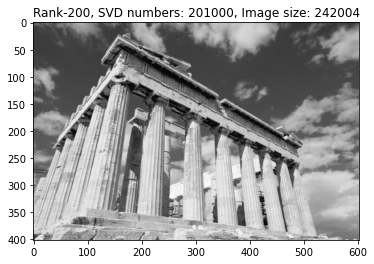

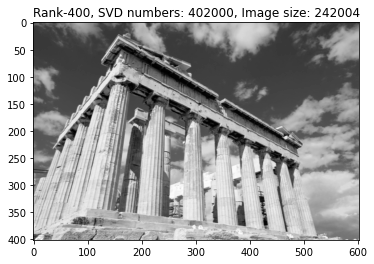

In [73]:
# Reconstruct the image using rank-k approximation with k in [5, 10, 25, 50, 200, 400].
for k in [5, 10, 25, 50, 200, 400]:
    # Reconstruct the image.
    reconstimg = np.matrix(U[:,:k] * S[:k,:k] * V[:,:k].transpose())
    # Display the reconstructed image.
    plt.imshow(reconstimg, cmap = 'gray')
    # Set title above the image.
    plt.title("Rank-%i, SVD numbers: %i, Image size: %i" % (k, k*(n + m + 1), n*m))
    # Show the image.
    plt.show()

# Example 5: Matrix Approximation

In [1]:
%display latex

In [38]:
A=matrix(RDF,[[1,-0.8],[0,1],[1,0]]);A

[ 1.0 -0.8]
[ 0.0  1.0]
[ 1.0  0.0]

In [39]:
U,S,V=A.SVD()

In [40]:
S.n(digits=3)

[ 1.62 0.000]
[0.000  1.00]
[0.000 0.000]

In [41]:
u1,u2,u3=U.column(0),U.column(1),U.column(2)

In [42]:
v1,v2=V.column(0),V.column(1)

In [43]:
s1,s2=S[0,0],S[1,1]

### Rank 1 approximation of A

In [44]:
A1=s1*(u1.column())*(v1.row());A1

[  0.9999999999999998  -0.7999999999999996]
[-0.48780487804878064   0.3902439024390244]
[  0.6097560975609756 -0.48780487804878037]

##### To compute $u_1 v_1^T$ we can use <code>(u1.column())*(v1.row())</code> or equivalently <code>u1.outer_product(v1)</code>

In [45]:
(A-A1).norm('frob')

1.0

In [116]:
### Rank 2 approximation of A

In [46]:
A2=s1*(u1.outer_product(v1))+s2*(u2.outer_product(v2));A2

[    0.9999999999999998    -0.7999999999999998]
[-5.551115123125783e-17     1.0000000000000004]
[    0.9999999999999999 1.1102230246251565e-16]

In [47]:
(A-A2).norm('frob')

5.688200336284365e-16